In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-personality-analysis/marketing_campaign.csv


**Importing basic libraries**

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.metrics import mean_squared_error 

**checking our data**

In [3]:
df = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv',sep= '\t')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info

<bound method DataFrame.info of          ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012    

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


**Filling null values**

In [11]:

df['Income']=df['Income'].fillna(df['Income'].mean())

In [12]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [13]:
df['Dt_Customer'].max()

'31-12-2013'

In [14]:
df['age']=2023-df["Year_Birth"]

In [15]:
pd.set_option('display.max_columns', None)
df.head(5)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,66
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,69
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,58
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,39
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,42


**checking outliers in age and income column and fixing them **

<Axes: xlabel='age'>

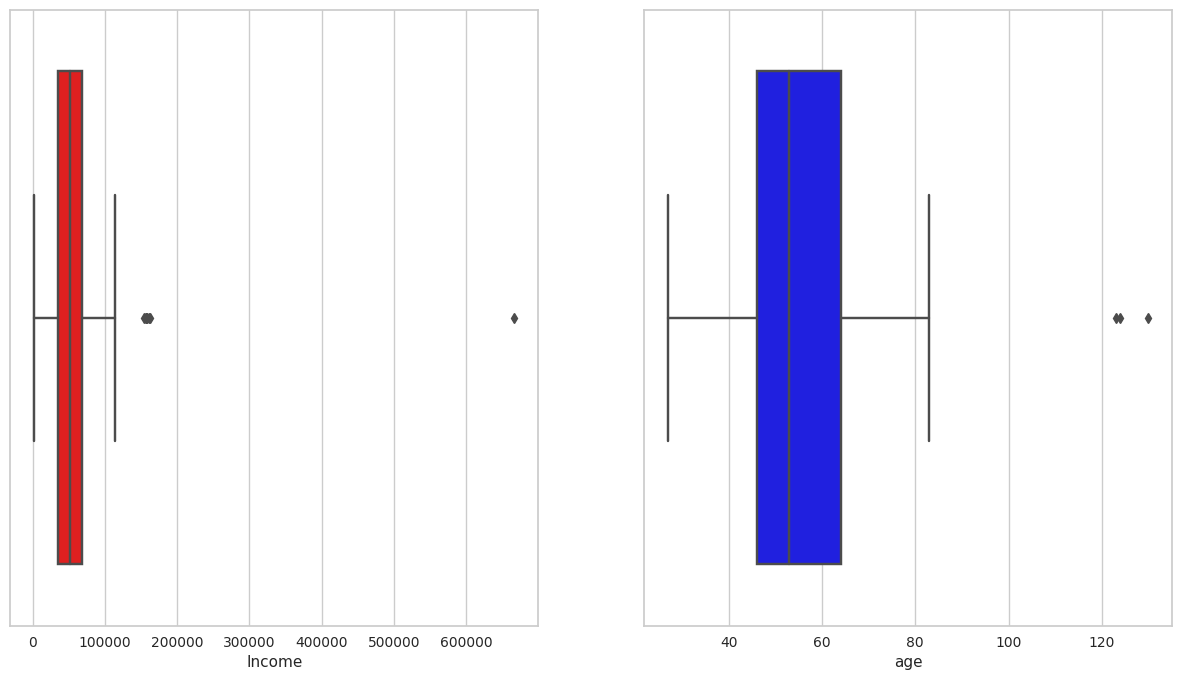

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.xlabel='income'
sns.boxplot(data=df,x='Income',color='red')
plt.subplot(1,2,2)
plt.xlabel='age'
sns.boxplot(data=df,x='age',color='blue')

In [17]:
df = df[df['age'] < 80]

df=df[df['Income']<150000]


<Axes: xlabel='age'>

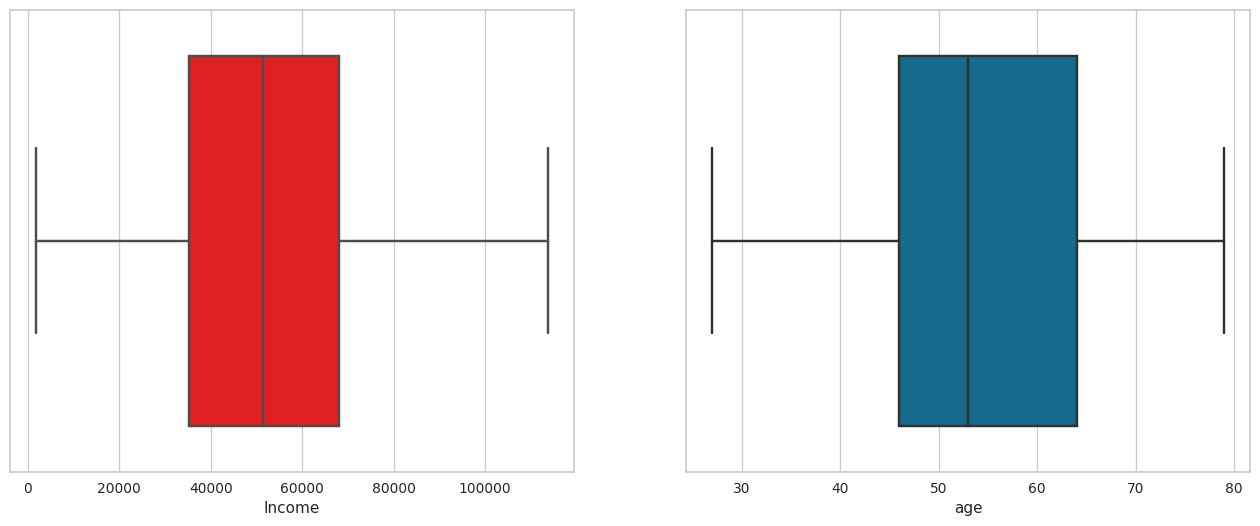

In [18]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.xlabel='income'
sns.boxplot(data=df,x='Income',color = "red")
plt.subplot(1,2,2)
plt.xlabel='age'
sns.boxplot(data=df,x='age')

## **performing merging operations on columns**


In [19]:
df['Marital_Status'].value_counts()

Marital_Status
Married     858
Together    575
Single      477
Divorced    228
Widow        75
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [20]:
df['relationship']=df['Marital_Status'].replace({'Married':'in_relationship' , 'Together':'in_relationship' , 'Single':'single' , 'Divorced':'single',
                                                    'YOLO':'single' , 'Absurd':'single' , 'Widow':'single' ,'Alone':'single'})

In [21]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'relationship'],
      dtype='object')

In [22]:
df['members_home']=df['Kidhome']+df['Teenhome']+df['relationship'].replace({'single':0,'in_relationship':1})

In [23]:
df['AcceptedCmp'] =df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3']
+ df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    1
Length: 2220, dtype: int64

In [24]:
df['num_purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [25]:
df['expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] 
+ df['MntFishProducts'] + df['MntSweetProducts'] +df['MntGoldProds']

0       348
1         9
2       174
3        18
4        88
       ... 
2235    407
2236      8
2237     68
2238    171
2239     24
Length: 2220, dtype: int64

## **Dropping unusefull columns **

In [26]:
df.drop(labels=['Marital_Status','ID','Year_Birth'
                  ,'Dt_Customer', 'Kidhome','Teenhome',
                  'MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts',
                  'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
                'AcceptedCmp2','Z_CostContact', 'Z_Revenue',"Recency", "Complain"], axis=1, inplace=True)

In [27]:
df.columns

Index(['Education', 'Income', 'Response', 'age', 'relationship',
       'members_home', 'AcceptedCmp', 'num_purchases', 'expenses'],
      dtype='object')

## **Making graphical representation of data  **

<Axes: xlabel='Income', ylabel='Count'>

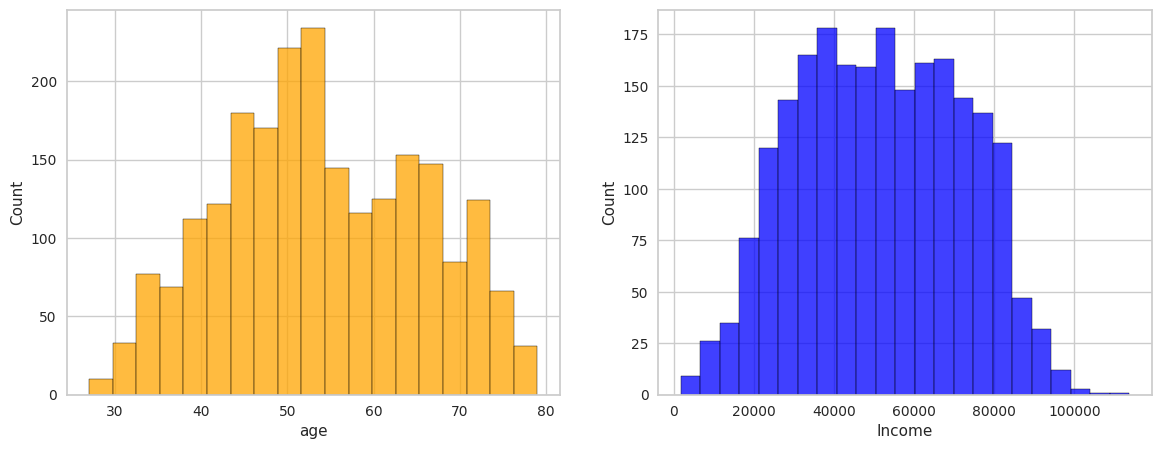

In [28]:
plt.figure(figsize=(14, 5))
plt.subplot(1,2,1)
sns.histplot(df,x='age',color = "orange")
plt.subplot(1,2,2)
sns.histplot(df,x='Income',color='blue')

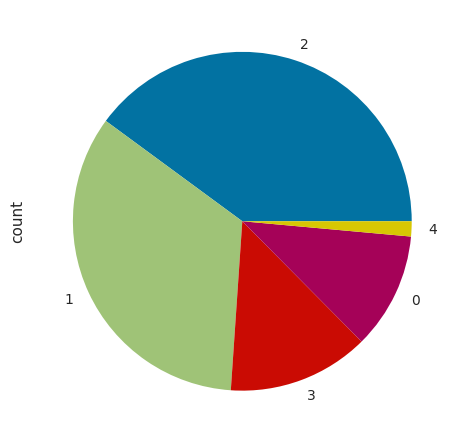

In [29]:
plt.plot(figsize=(12,10))
df.members_home.value_counts().plot(kind='pie')
plt.show()

<Axes: xlabel='relationship', ylabel='count'>

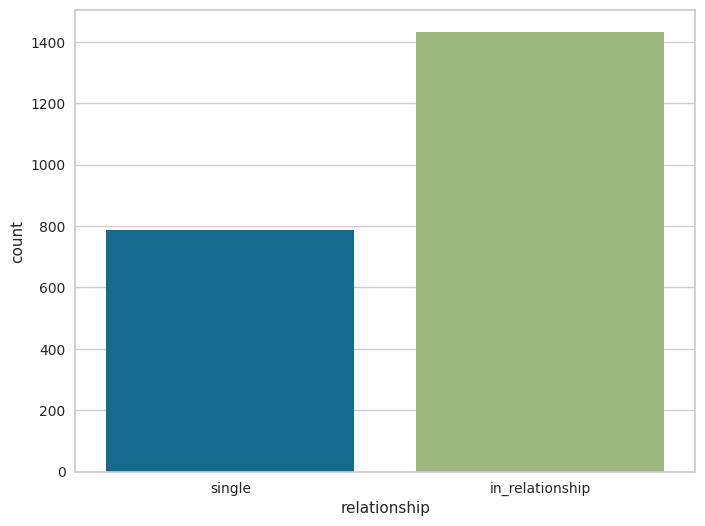

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(df,x='relationship')

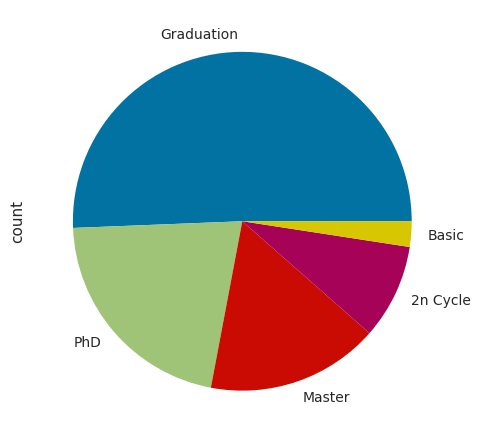

In [31]:
#parplot of eduction
plt.plot(figsize=(12,10))
df.Education.value_counts().plot(kind='pie')
plt.show()

## **Using labelencoder**

In [32]:
df['Education']=  preprocessing.LabelEncoder().fit_transform(df['Education'])
df['relationship']=  preprocessing.LabelEncoder().fit_transform(df['relationship'])

## **Scalling our data**

In [33]:
scaler=StandardScaler()
scaled_features = scaler.fit_transform(df.values)
scaled_data = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)

In [34]:
pca = PCA(n_components=4)
data_pca = pca.fit_transform(scaled_data)

In [35]:
data_pca.shape

(2220, 4)

## **using k-means algorithm for clustering **

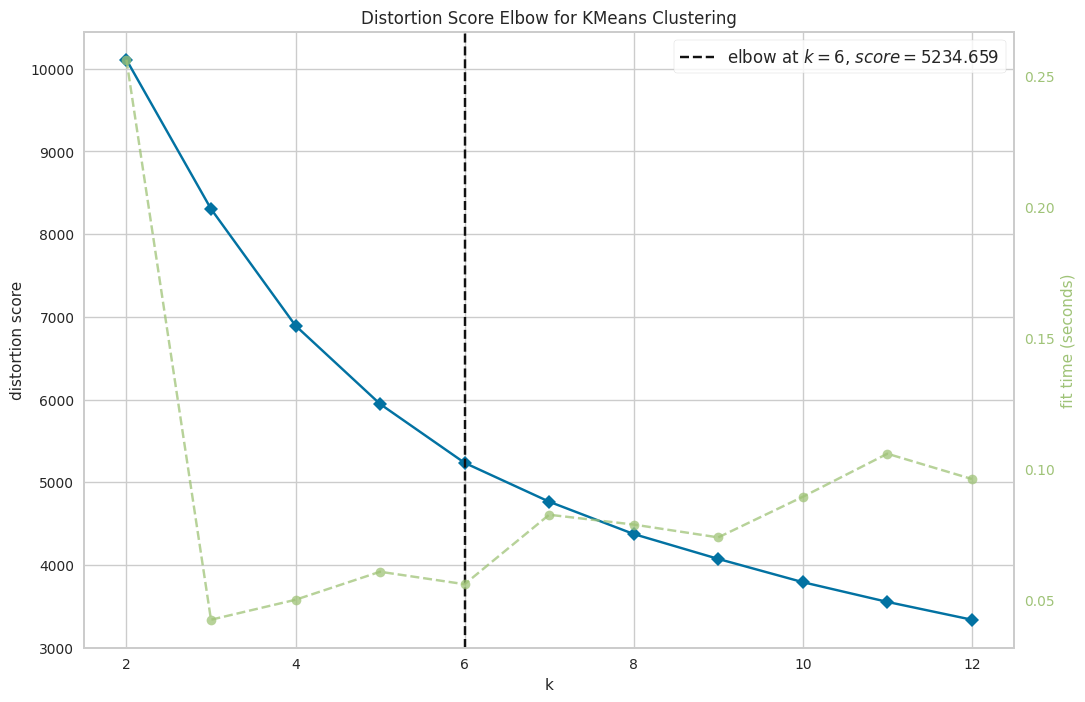

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# visualizing elbow method graph 
plt.figure(figsize=(12, 8))
elbow_graph = KElbowVisualizer(KMeans(random_state=85), k=12)
elbow_graph.fit(data_pca)
elbow_graph.show()

In [37]:
#using k-means algorithm
kmeans = KMeans(n_clusters =5 )
cluster = kmeans.fit_predict(data_pca)

In [38]:
df['cluster']=cluster

In [39]:
cluster.min(),cluster.max()

(0, 4)

In [40]:
cluster

array([1, 2, 0, ..., 1, 0, 3], dtype=int32)

Text(0.5, 1.0, 'clusters in data')

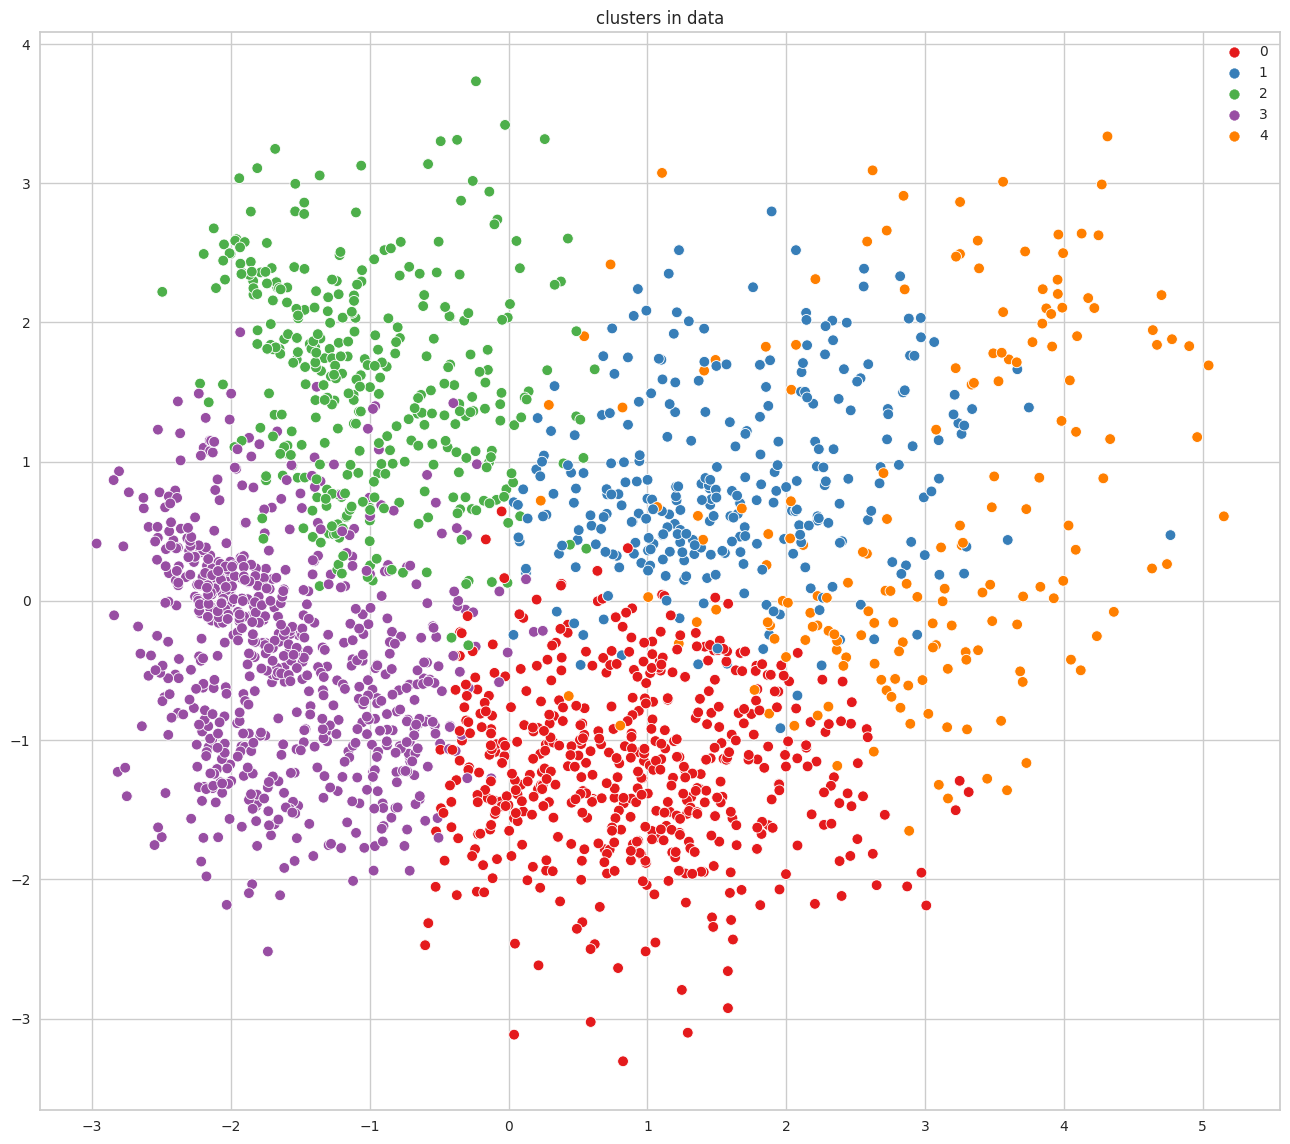

In [41]:
#ploting cluster...
plt.figure(figsize=(16,14))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=cluster,s=60, palette='Set1')
plt.title('clusters in data')

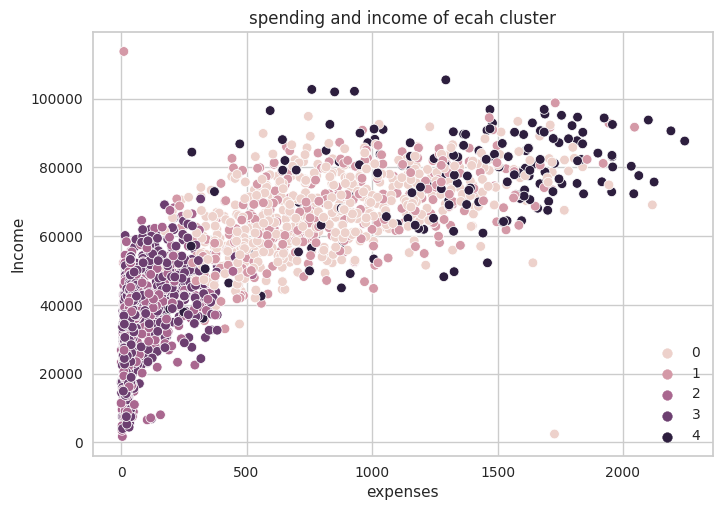

In [42]:
pl = sns.scatterplot(data = df, x=df["expenses"], y=df["Income"], hue=df["cluster"])
pl.set_title("spending and income of ecah cluster")
plt.legend()
plt.show()

<Axes: xlabel='cluster', ylabel='count'>

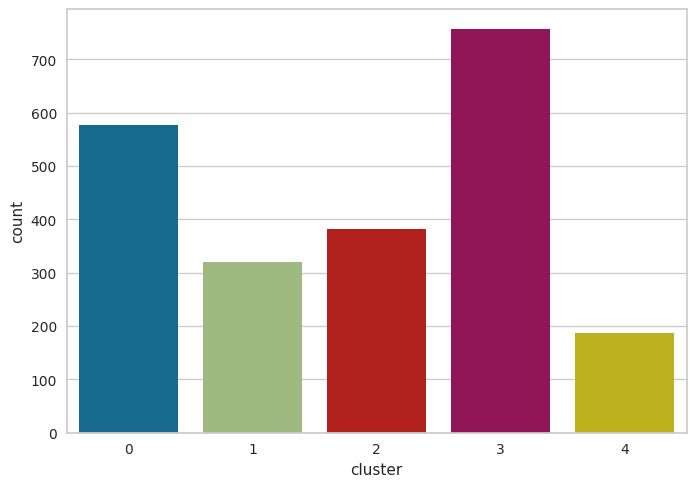

In [43]:
sns.countplot(x=df['cluster'])

<Axes: xlabel='cluster', ylabel='expenses'>

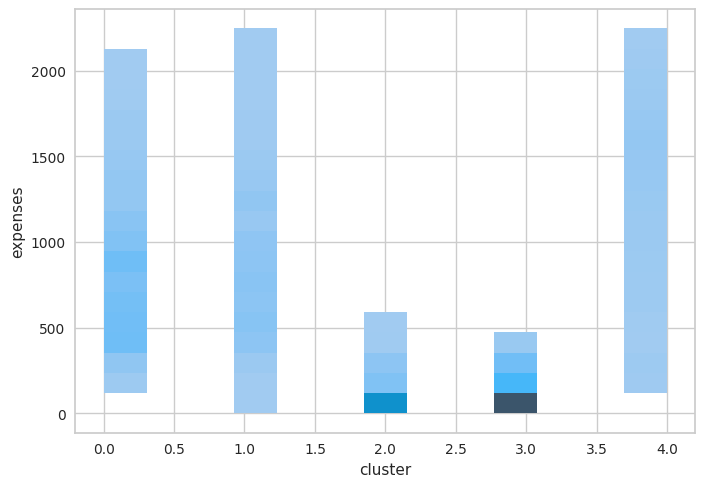

In [44]:
sns.histplot(x=df['cluster'],y=df['expenses'])

<Axes: xlabel='cluster', ylabel='Income'>

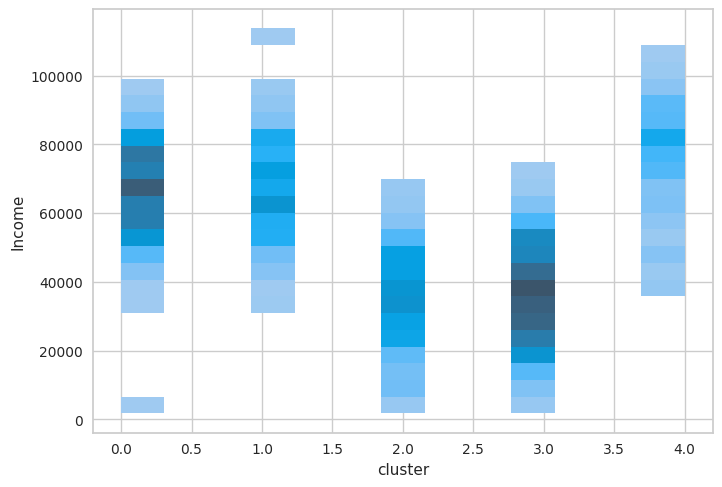

In [45]:
sns.histplot(x=df['cluster'],y=df['Income'])